In [59]:
import numpy as np
import matplotlib.pylab as plt
import scipy.signal as scisig

In [60]:
numpoints = 4096 # Total number of points in waveform
freqlist = np.linspace(1, 151, 76) # frequencies for frequency comb
tottime = 1000 # Longer totaltime for PSD
time = np.linspace(0, 1*tottime, numpoints*tottime) # make 4096 points equal to 1 second
amp = 9 # general amplitude, basically scaled this manually so that the highest value of the waveform was close to but less than 511 (the max of the AWG)

In [61]:
def gauss(x,a,mu,sigma):
    return (a*np.exp(-0.5*((x-mu)/sigma)**2))

In [62]:
totalwav = np.zeros(numpoints*tottime)
# Product the waveform
for i in freqlist:
    totalwav = totalwav + amp*np.sin(2*np.pi*i*time)
    # totalwav=totalwav+ gauss(i*time,amp,1000,100)
# Make all numbers integer
totalwav2 = totalwav.astype(int)

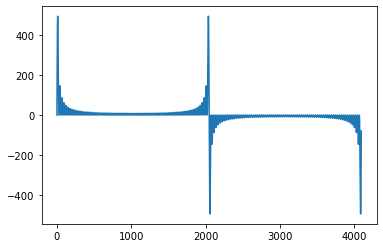

In [63]:
# Look at waveform
# display(totalwav2)
plt.plot(totalwav2[:numpoints])

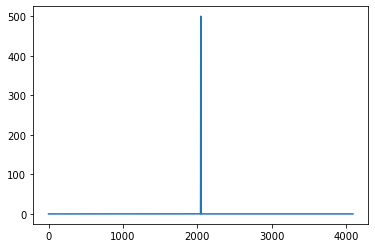

In [71]:
from tkinter import Y


x=np.arange(0,4096,1)
y1=gauss(x,500,1000,100)
y2=gauss(x,500,2000,50)
y3=gauss(x,500,2048,1)
y=y1+y2+y3
plt.plot(y3[:numpoints])

In [72]:
PSD = scisig.welch(totalwav, fs = 4096, nperseg = 100*4096)
PSD2 = scisig.welch(totalwav2, fs = 4096, nperseg = 100*4096)

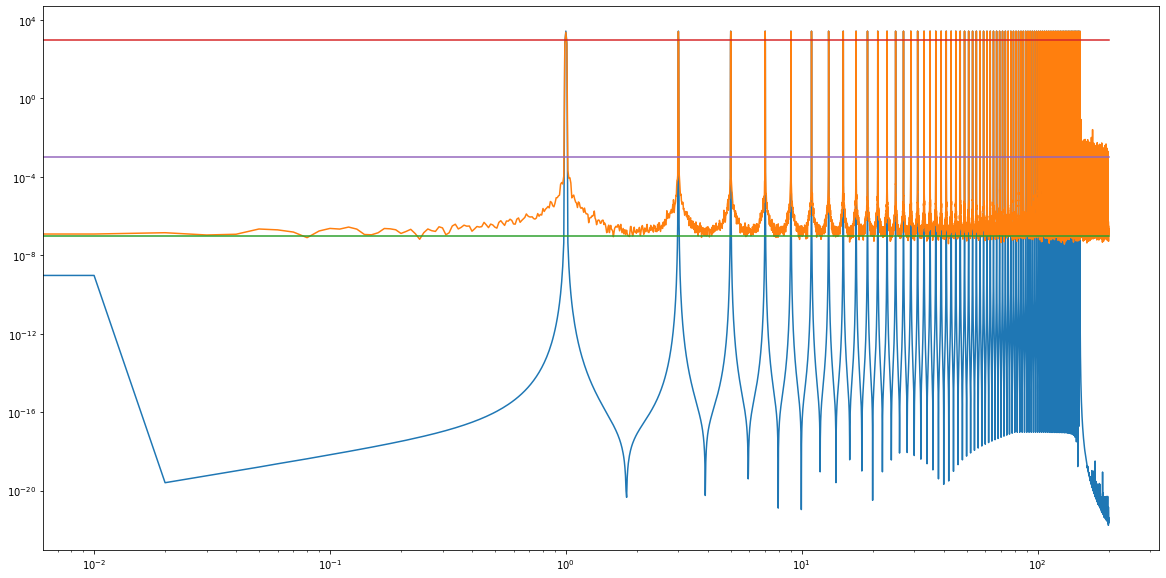

In [73]:
# Compare digitised signal to regular signal in frequency space
lb = 100*0
ub = 100*200
plt.figure(figsize = (20, 10))
plt.plot(PSD[0][lb:ub], PSD[1][lb:ub])
plt.plot(PSD2[0][lb:ub], PSD2[1][lb:ub])
plt.plot([lb/100,ub/100], [10**(-7), 10**(-7)])
plt.plot([lb/100,ub/100], [10**(3), 10**(3)])
plt.plot([lb/100,ub/100], [10**(-3), 10**(-3)])
plt.xscale('log')
plt.yscale('log')

In [74]:
# Creater header and main file for csv
Header = [['Start:',0], ['Length:',4096], ['Sample Rate:',4096]] # Sample rate is in samples per second
Main = [[i] for i in list(totalwav2[:numpoints])]

In [75]:
import csv

# name of csv file 
filename = "C:\\Users\\nEXO\\Downloads\\test.csv"
    
# writing to csv file 
with open(filename, 'w', newline='') as csvfile: 
    # creating a csv writer object 
    csvwriter = csv.writer(csvfile) 
        
    csvwriter.writerows(Header) 
        
    # writing the data rows 
    csvwriter.writerows(Main)

In [76]:
# Creater header and main file for csv
Header = [['Start:',0], ['Length:',4096], ['Sample Rate:',4096]] # Sample rate is in samples per second
Main = [[i] for i in list(y3[:numpoints])]

In [77]:
import csv

# name of csv file 
filename = "C:\\Users\\nEXO\\Downloads\\test_y.csv"
    
# writing to csv file 
with open(filename, 'w', newline='') as csvfile: 
    # creating a csv writer object 
    csvwriter = csv.writer(csvfile) 
        
    csvwriter.writerows(Header) 
        
    # writing the data rows 
    csvwriter.writerows(Main)